# Imports

In [1]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix,precision_score
from scipy.sparse import hstack,csr_matrix
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,Input
from sklearn import preprocessing
from tensorflow.keras.models import Model
import scipy.sparse as sp
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import learning_curve,cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

2024-02-15 17:35:46.185523: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 17:35:46.185642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 17:35:46.325682: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# pd.options.mode.chained_assignment = None 

# Data Exploration

In [3]:
df = pd.read_csv('/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')

In [4]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [5]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
df.shape

(17880, 18)

<Axes: >

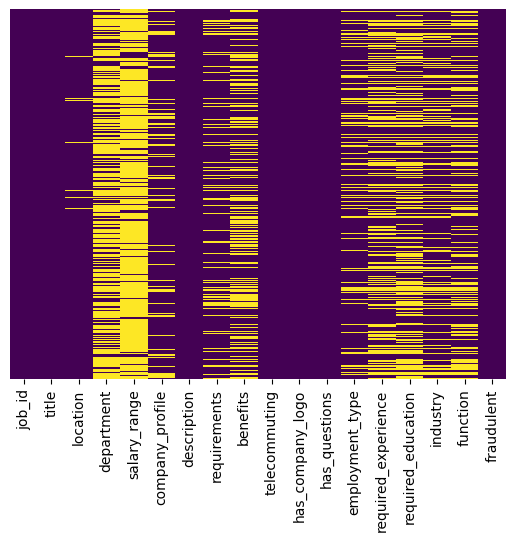

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)

In [12]:
print(len(categorical))
print(categorical)

13
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [13]:
print(len(numerical))
print(numerical)

5
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [14]:
df[numerical].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df[numerical][df[numerical]=='?'].count()

job_id              0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [16]:
df[categorical][df[categorical]=='?'].count()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
dtype: int64

<Axes: >

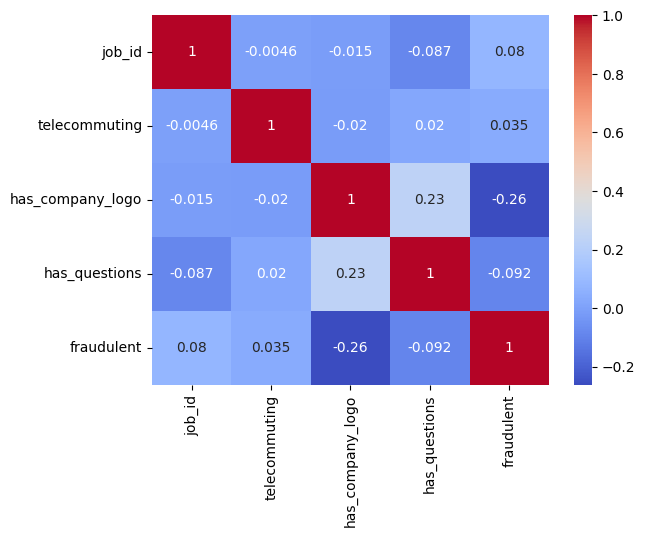

In [17]:
sns.heatmap(df[numerical].corr(), cmap='coolwarm', annot=True)

In [18]:
numerical_to_drop=['telecommuting','has_questions']

df.drop(columns=numerical_to_drop, inplace=True)

<Axes: xlabel='has_company_logo'>

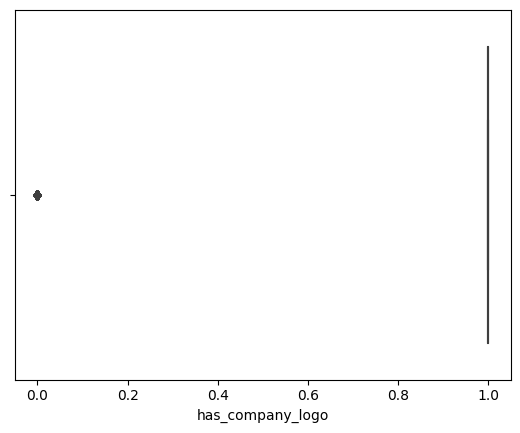

In [19]:
sns.boxplot(x='has_company_logo',data=df)

In [20]:
df=df[df['has_company_logo']>0.0]

<Axes: xlabel='has_company_logo'>

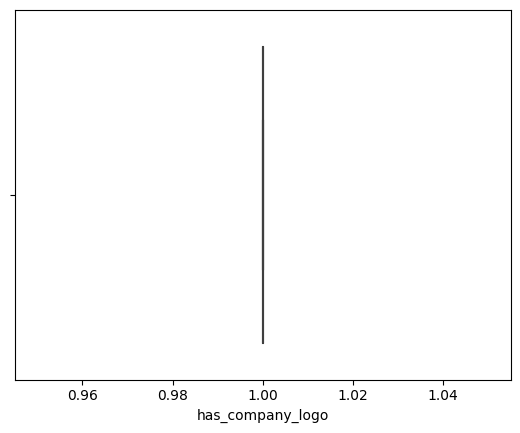

In [21]:
sns.boxplot(x='has_company_logo',data=df)

In [22]:
df['country'] = df['location'].str.split(',').str[0]

/tmp/ipykernel_18/1353859512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['location'].str.split(',').str[0]


In [23]:
df.nunique()

job_id                 14220
title                   9091
location                2393
department              1078
salary_range             659
company_profile         1579
description            11723
requirements            9811
benefits                5094
has_company_logo           1
employment_type            5
required_experience        7
required_education        13
industry                 129
function                  37
fraudulent                 2
country                   86
dtype: int64

<Axes: xlabel='fraudulent', ylabel='count'>

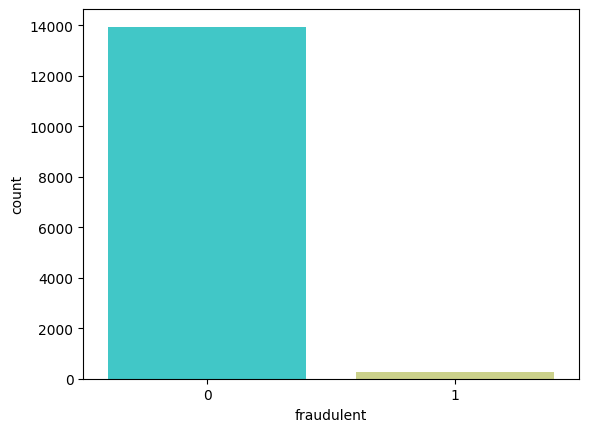

In [24]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

In [25]:
fake=df[df['fraudulent']==1]
fake.shape

(283, 17)

In [26]:
real=df[df['fraudulent']==0]
real.shape

(13937, 17)

In [27]:
df.shape

(14220, 17)

In [28]:
fake=fake.sample(13937,replace=True)

In [29]:
real.shape,fake.shape

((13937, 17), (13937, 17))

In [30]:
df = pd.concat([fake, real], ignore_index=True)
df.reset_index()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,0,11543,Director of Engineering HMA Security Products,"US, CA, San Jose",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,"NETGEAR, Inc. (NASDAQGM: NTGR) designs innovat...",Skills and RequirementsMSEE with 5 years exper...,What Is Offered:Very competitive base salary.3...,1,Full-time,Director,Master's Degree,Telecommunications,Engineering,1,US
1,1,3934,Project Manager: Mechanical,"US, CA, Bakersfield",Oil & Energy,NaN,Process Unlimited and Refined Resources have p...,Essential Duties and Responsibilities:* Develo...,General Qualifications:Must have a desire to l...,"What is Offered:* Clean, safe, enjoyable envir...",1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Project Management,1,US
2,2,8655,Production Supervisor,"US, TX, Houston",NaN,40000-45000,"Founded in 1993, our group has, in a few short...",Oversee plant operations.Monitor and troublesh...,Flexible ScheduleMinimum 5 years experience.Kn...,16.00/hr as starting pay + performance bonus,1,Full-time,NaN,NaN,Media Production,Manufacturing,1,US
3,3,3270,Process Engineer Mechanical,"US, CA, Bakersfield",Oil & Energy,NaN,Process Unlimited and Refined Resources have p...,"We are a full-service engineering, project man...",Experience Preferred:P.E. Registration a plus ...,NaN,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Other,1,US
4,4,9099,Restaurant Manager,NaN,NaN,NaN,Awarded by Expatriate Lifestyle Magazine with ...,Restaurant managers ensure that restaurants op...,"* Budgeting, planning and controlling the fina...",NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,27869,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,NaN,NaN,Internet,Product Management,0,US
27870,27870,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,1,Contract,NaN,NaN,Utilities,NaN,0,US
27871,27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
27872,27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


<Axes: xlabel='fraudulent', ylabel='count'>

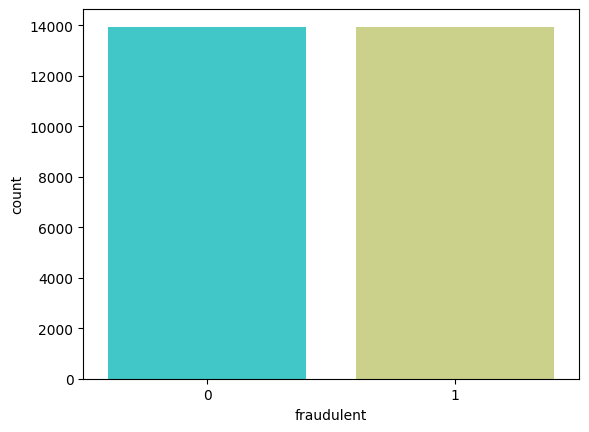

In [31]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

Text(0, 0.5, 'No. of Jobs')

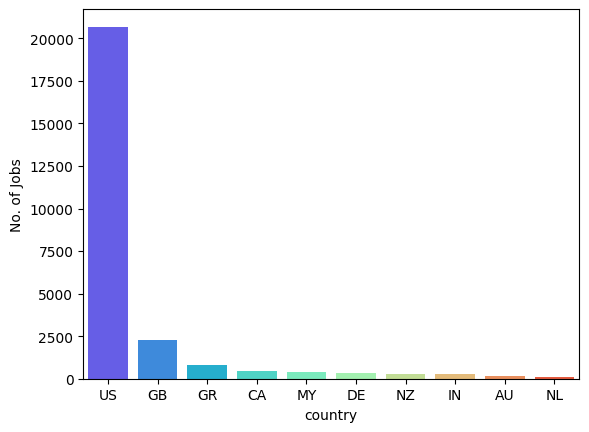

In [32]:
country = df['country'].value_counts().nlargest(10).index.tolist()
ax=sns.countplot(data=df, x='country', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

Text(0, 0.5, 'No. of Jobs')

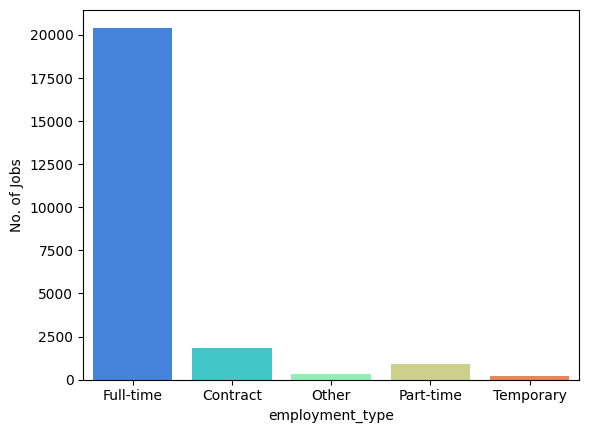

In [33]:
ax=sns.countplot(data=df, x='employment_type', palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [34]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,11543,Director of Engineering HMA Security Products,"US, CA, San Jose",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,"NETGEAR, Inc. (NASDAQGM: NTGR) designs innovat...",Skills and RequirementsMSEE with 5 years exper...,What Is Offered:Very competitive base salary.3...,1,Full-time,Director,Master's Degree,Telecommunications,Engineering,1,US
1,3934,Project Manager: Mechanical,"US, CA, Bakersfield",Oil & Energy,NaN,Process Unlimited and Refined Resources have p...,Essential Duties and Responsibilities:* Develo...,General Qualifications:Must have a desire to l...,"What is Offered:* Clean, safe, enjoyable envir...",1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Project Management,1,US
2,8655,Production Supervisor,"US, TX, Houston",NaN,40000-45000,"Founded in 1993, our group has, in a few short...",Oversee plant operations.Monitor and troublesh...,Flexible ScheduleMinimum 5 years experience.Kn...,16.00/hr as starting pay + performance bonus,1,Full-time,NaN,NaN,Media Production,Manufacturing,1,US
3,3270,Process Engineer Mechanical,"US, CA, Bakersfield",Oil & Energy,NaN,Process Unlimited and Refined Resources have p...,"We are a full-service engineering, project man...",Experience Preferred:P.E. Registration a plus ...,NaN,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Other,1,US
4,9099,Restaurant Manager,NaN,NaN,NaN,Awarded by Expatriate Lifestyle Magazine with ...,Restaurant managers ensure that restaurants op...,"* Budgeting, planning and controlling the fina...",NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,NaN,NaN,Internet,Product Management,0,US
27870,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,1,Contract,NaN,NaN,Utilities,NaN,0,US
27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


Text(0, 0.5, 'No. of Jobs')

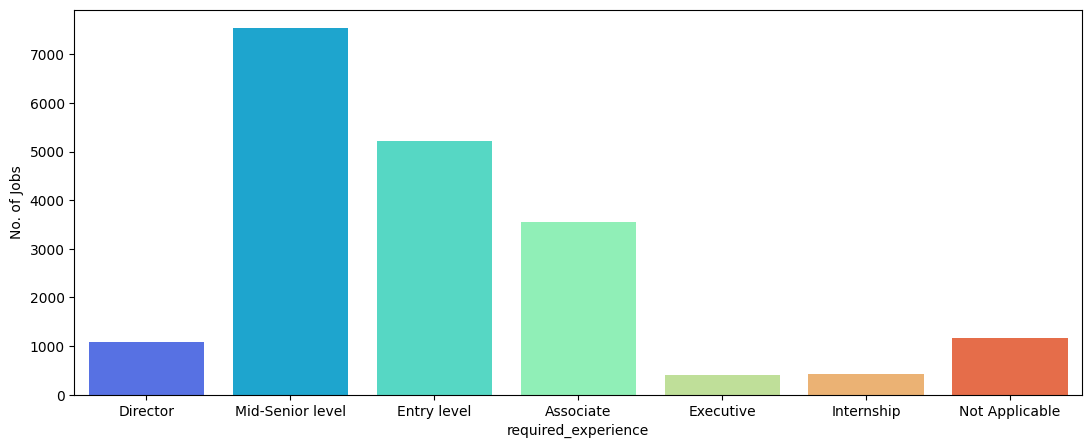

In [35]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x='required_experience', palette='rainbow')
ax.set_ylabel('No. of Jobs')

Text(0, 0.5, 'No. of Jobs')

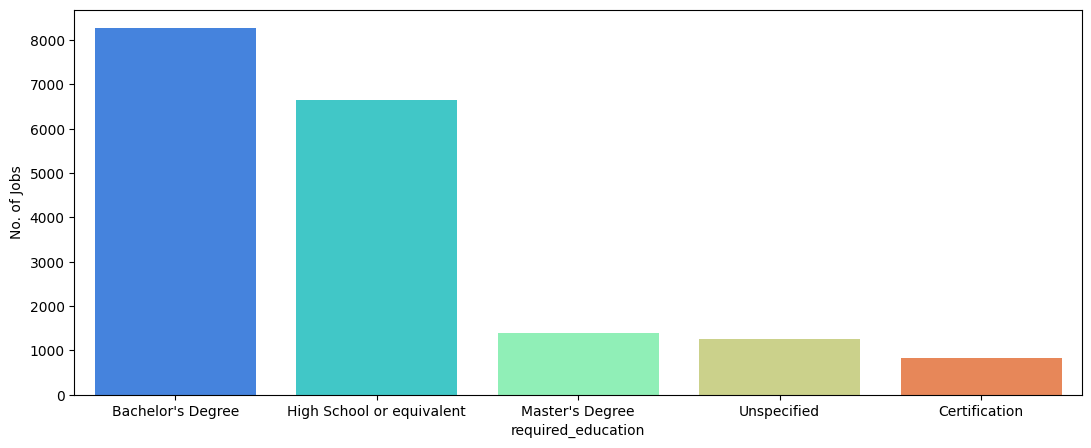

In [36]:
plt.figure(figsize=(13,5))
country = df['required_education'].value_counts().nlargest(5).index.tolist()
ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [37]:
df.fillna(' ',inplace=True)

In [38]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
has_company_logo       0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
dtype: int64

In [39]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,11543,Director of Engineering HMA Security Products,"US, CA, San Jose",Engineering,,Aptitude Staffing Solutions has redesigned the...,"NETGEAR, Inc. (NASDAQGM: NTGR) designs innovat...",Skills and RequirementsMSEE with 5 years exper...,What Is Offered:Very competitive base salary.3...,1,Full-time,Director,Master's Degree,Telecommunications,Engineering,1,US
1,3934,Project Manager: Mechanical,"US, CA, Bakersfield",Oil & Energy,,Process Unlimited and Refined Resources have p...,Essential Duties and Responsibilities:* Develo...,General Qualifications:Must have a desire to l...,"What is Offered:* Clean, safe, enjoyable envir...",1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Project Management,1,US
2,8655,Production Supervisor,"US, TX, Houston",,40000-45000,"Founded in 1993, our group has, in a few short...",Oversee plant operations.Monitor and troublesh...,Flexible ScheduleMinimum 5 years experience.Kn...,16.00/hr as starting pay + performance bonus,1,Full-time,,,Media Production,Manufacturing,1,US
3,3270,Process Engineer Mechanical,"US, CA, Bakersfield",Oil & Energy,,Process Unlimited and Refined Resources have p...,"We are a full-service engineering, project man...",Experience Preferred:P.E. Registration a plus ...,,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Other,1,US
4,9099,Restaurant Manager,,,,Awarded by Expatriate Lifestyle Magazine with ...,Restaurant managers ensure that restaurants op...,"* Budgeting, planning and controlling the fina...",,1,,,,,,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,17873,Product Manager,"US, CA, San Francisco",Product Development,,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,,,Internet,Product Management,0,US
27870,17874,Recruiting Coordinator,"US, NC, Charlotte",,,,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,,1,Contract,,,Utilities,,0,US
27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,,Computer Software,Sales,0,CA
27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


In [40]:
df['combined_text'] = df[['title', 'location', 'salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','department']].apply(lambda x: ' '.join(x), axis=1)

df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department'], inplace=True)

In [41]:
df.drop('country',axis=1,inplace=True)

In [42]:
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,11543,1,1,Director of Engineering HMA Security Products ...
1,3934,1,1,"Project Manager: Mechanical US, CA, Bakersfiel..."
2,8655,1,1,"Production Supervisor US, TX, Houston 40000-45..."
3,3270,1,1,"Process Engineer Mechanical US, CA, Bakersfiel..."
4,9099,1,1,Restaurant Manager Awarded by Expatriate L...


In [43]:
fake=df[df['fraudulent']==1]['combined_text']
real=df[df['fraudulent']==0]['combined_text']

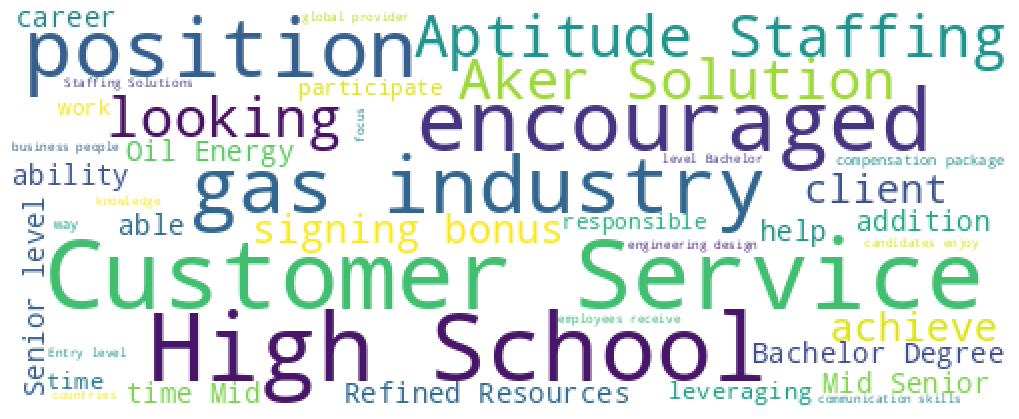

In [44]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(fake))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

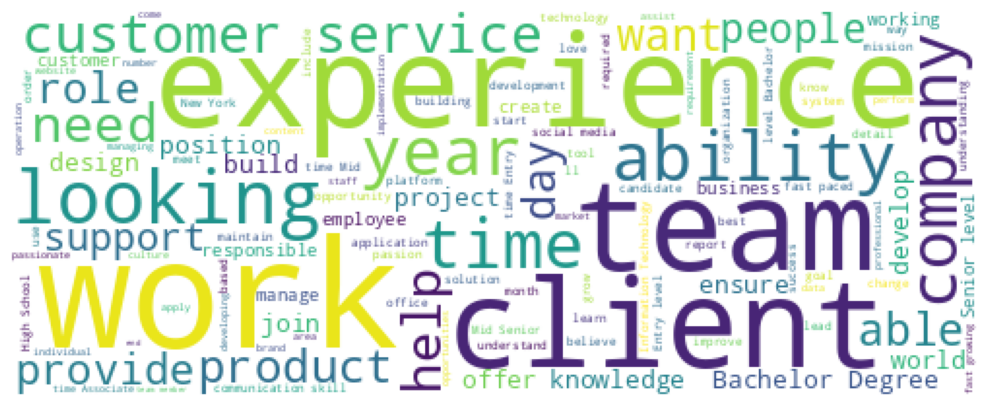

In [45]:
wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(real))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

# Data Cleaning


In [46]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [47]:
df['combined_text']=df['combined_text'].apply(clean_text)

In [48]:
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,11543,1,1,director engineering hma security products us ...
1,3934,1,1,project manager mechanical us ca bakersfield p...
2,8655,1,1,production supervisor us tx houston 40000 4500...
3,3270,1,1,process engineer mechanical us ca bakersfield ...
4,9099,1,1,restaurant manager awarded expatriate lifestyl...


# Data Normalization

Using spaCy's English language model (`en_core_web_sm`) for text preprocessing. The function called `normalize_text` tokenizes the input text, lemmatizes each token, and then returns the normalized text.

In [49]:
nlp = spacy.load("en_core_web_sm")

def normalize_text(text):
    # Tokenize the text and apply lemmatization
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc]
    normalized_text = ' '.join(normalized_words)
    return normalized_text


In [50]:
df['combined_text']=df['combined_text'].apply(normalize_text)

# Feature Extraction

Preprocess the text data by applying **Part-of-Speech tagging** and **CountVectorizer**. It generates additional features based on grammatical structures and combines them with original text features. Finally, it saves the vectorizer for consistent preprocessing.

In [51]:
text_columns = ['combined_text']

df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)
df['pos_features'] = df['pos_features'].apply(lambda tags: ' '.join(tag[1] for tag in tags))

X_train = df.drop('fraudulent', axis=1)
y_train = df['fraudulent']

vectorizer = CountVectorizer(ngram_range=(1, 2))
text_matrix_train = vectorizer.fit_transform(X_train['combined_text'])
pos_matrix_train = vectorizer.transform(X_train['pos_features'])
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])

with open('countvectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

/tmp/ipykernel_18/3994699578.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)


# Models

In [52]:
X=combined_matrix_train
y=df['fraudulent'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

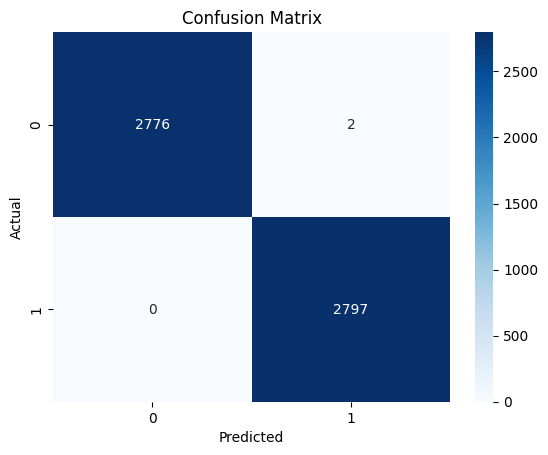

Cross-validation scores: [0.99977578 0.99977578 1.         1.         1.        ]
Average cross-validation score: 0.9999103139013453
Test set accuracy: 0.9996412556053812
Test set precision: 0.9992854590925331
Test set recall: 1.0
Test set F1 score: 0.9996426018584703


In [54]:
model = LogisticRegression(max_iter=500)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

### MultinomialNB

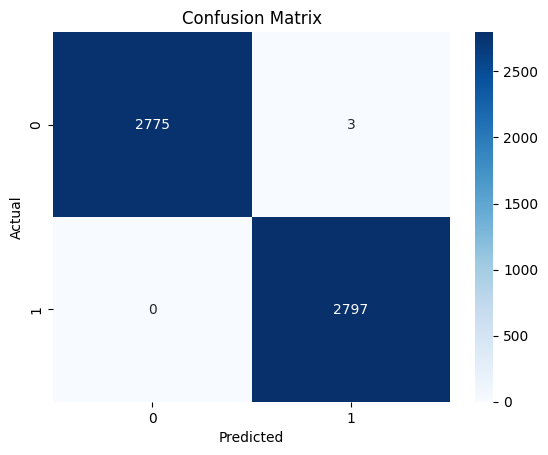

Cross-validation scores: [0.99977578 0.99977578 1.         1.         1.        ]
Average cross-validation score: 0.9999103139013453
Test set accuracy: 0.9994618834080717
Test set precision: 0.9992854590925331
Test set recall: 1.0
Test set F1 score: 0.9994639985706628


In [55]:
model2 = MultinomialNB()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

### SVC

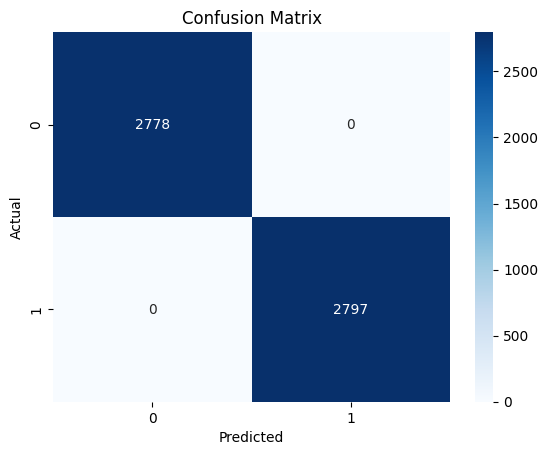

Cross-validation scores: [0.99977578 0.99977578 1.         1.         1.        ]
Average cross-validation score: 0.9999103139013453
Test set accuracy: 1.0
Test set precision: 0.9992854590925331
Test set recall: 1.0
Test set F1 score: 1.0


In [56]:
model3 = SVC()
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

### Descision Tree

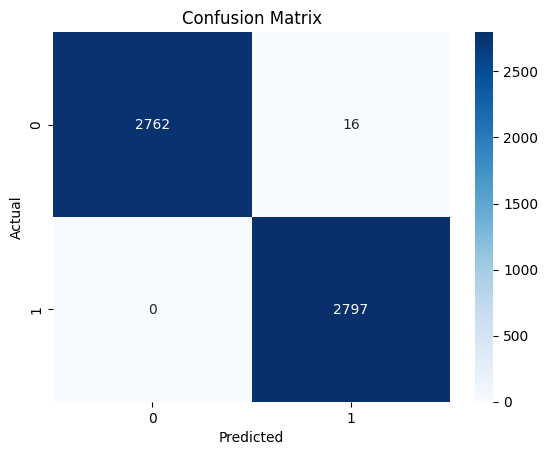

Cross-validation scores: [0.99977578 0.99977578 1.         1.         1.        ]
Average cross-validation score: 0.9999103139013453
Test set accuracy: 0.9971300448430493
Test set precision: 0.9992854590925331
Test set recall: 1.0
Test set F1 score: 0.9971479500891265


In [57]:
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

**If you found this notebook helpful, please consider upvoting it. Your support is greatly appreciated and will help me immensely. Thank you!**